In [1]:
import numpy as np
import pandas as pd
import os

import h5py
#import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader




base_dir = 'pt_files_bio/'
f_dir = os.listdir(base_dir)
h5_files = []
h5_files_train = []
h5_files_train_1x = []
# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".pt")) & ((("2x" in filename))):
        h5_files_train.append(base_dir+filename)

    if (filename.endswith(".pt")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        h5_files.append(base_dir+filename)

from torch.utils.data import Dataset

h5_files = np.sort(h5_files)
h5_files_train=np.sort(h5_files_train)
#for i in h5_files:
arr = h5_files
contains_hanford = np.array(['hanford' in item for item in arr])

# Alphabetical sorting key
alphabetical_order = np.argsort(arr)

# Prioritize "hanford" and then sort alphabetically within each group
sorted_indices = np.lexsort((alphabetical_order, ~contains_hanford))

# Use sorted indices to reorder the array
sorted_arr = arr[sorted_indices]
sorted_arr

sorted_arr2 = h5_files_train[sorted_indices]
xtest = sorted_arr2[0:33]
xtrain = sorted_arr2[33:]#np.concatenate([sorted_arr2[33:50:3], sorted_arr2[50:]])
print(xtest)

ytest = sorted_arr[0:33]
ytrain = sorted_arr[33:]#np.concatenate([sorted_arr[33:50:3], sorted_arr[50:]])
print(ytrain)
print(xtrain)


['pt_files_bio/hanford_diff_lose_14_10_2xscale.pt'
 'pt_files_bio/hanford_diff_lose_18_10_2xscale.pt'
 'pt_files_bio/hanford_diff_lose_24_17_2xscale.pt'
 'pt_files_bio/hanford_diff_lose_31_7_2xscale.pt'
 'pt_files_bio/hanford_diff_lose_34_15_2xscale.pt'
 'pt_files_bio/hanford_diff_lose_41_12_2xscale.pt'
 'pt_files_bio/hanford_gain_14_10_2xscale.pt'
 'pt_files_bio/hanford_gain_24_17_2xscale.pt'
 'pt_files_bio/hanford_gain_27_14_2xscale.pt'
 'pt_files_bio/hanford_gain_31_7_2xscale.pt'
 'pt_files_bio/hanford_gain_35_23_2xscale.pt'
 'pt_files_bio/hanford_gain_37_9_2xscale.pt'
 'pt_files_bio/hanford_gain_45_19_2xscale.pt'
 'pt_files_bio/hanford_lose_14_10_2xscale.pt'
 'pt_files_bio/hanford_lose_18_19_2xscale.pt'
 'pt_files_bio/hanford_lose_24_17_2xscale.pt'
 'pt_files_bio/hanford_lose_27_14_2xscale.pt'
 'pt_files_bio/hanford_lose_33_24_2xscale.pt'
 'pt_files_bio/hanford_lose_35_23_2xscale.pt'
 'pt_files_bio/hanford_lose_36_11_2xscale.pt'
 'pt_files_bio/hanford_lose_40_17_2xscale.pt'
 'pt_fi

In [2]:
#for i in h5_files:
import random
def make_big_patches(pt_files):
    x_train=np.zeros([len(pt_files)*200, 114, 10, 200])
    count=0
    for k in range(len(pt_files)):
        x = torch.load(pt_files[k])[:,:,:,0]
        for i in range(x.shape[1]//20):
            for j in range(x.shape[2]//400):
                x_patch = x[:,0+i*20:20+i*20,0+j*400:400+j*400]
    #             plt.imshow(x_patch[113,:,:])
    #             plt.show()
                x_train[count, :, :, :] = x_patch
                count=count+1
    return x_train

def make_small_patches(pt_files_small, pt_files_big):
    x_train=np.zeros([len(pt_files_small)*200, 114, 10, 40])
    y_train=np.zeros([len(pt_files_big)*200, 114, 10, 200])
    count=0
    for k in range(len(pt_files_small)):
        x = torch.load(pt_files_small[k])[:,:,:,0]
        y = torch.load(pt_files_big[k])[:,:,:,0]
        for i in range(200):
            rand_i = random.uniform(0, 4.75)

            x_patch = x[:,0+int(rand_i*10):10+int(rand_i*10),0+int(rand_i*40):40+int(rand_i*40)]
            x_patch = x_patch[:,0:10,0:40]
            x_train[count, :, :, :] = x_patch
            
            y_patch = y[:,0+int(rand_i*10):10+int(rand_i*10),0+int(rand_i*200):200+int(rand_i*200)]
            y_patch = y_patch[:,0:10,0:200]
            y_train[count, :, :, :] = y_patch
            
            count=count+1
    return x_train, y_train

x_train, y_train = make_small_patches(xtrain, ytrain)

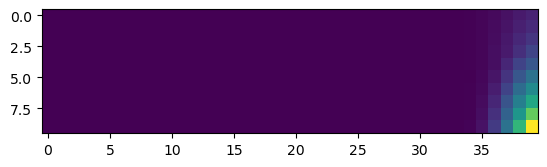

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,110,:,:])

In [4]:
x_test, y_test = make_small_patches(xtest,ytest)
# y_test = make_big_patches(ytest)
# y_train = make_big_patches(ytrain)

In [5]:
x_test.shape

(6600, 114, 10, 40)

In [6]:
y_test.shape

(6600, 114, 10, 200)

69

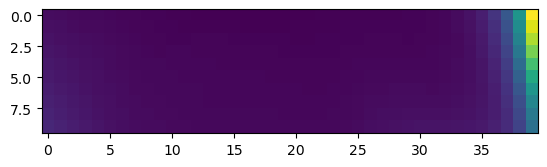

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,113,:,:])
len(xtrain)

In [19]:
!pip install segmentation-models-pytorch

  Obtaining dependency information for segmentation-models-pytorch from https://files.pythonhosted.org/packages/cb/70/4aac1b240b399b108ce58029ae54bc14497e1bbc275dfab8fd3c84c1e35d/segmentation_models_pytorch-0.3.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
     ---------------------------------------- 58.8/58.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for timm==0.9.2 from https://files.pythonhosted.org/packages/29/90/94f5deb8d76e24a89813aef95e8809ca8fd7414490428480eda19b133d4a/timm-0.9.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/68.5 kB ? eta -:--:--
     ---------------------------------------- 68.5/68.5 kB ? eta 0:00:00
  Obtaining dependency information for munch from https://fi

In [2]:
class VelDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = torch.load(file1)[:,:,:,0].float()
        high_scale = torch.load(file2)[:,:,:,0].float()
        
        return low_scale, high_scale

In [3]:
dataset = VelDataset(xtrain,ytrain)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True,  num_workers=0, drop_last=False)

dataset = VelDataset(xtest,ytest)
test_dataloader = DataLoader(dataset, batch_size=4, shuffle=False,  num_workers=0, drop_last=False)

In [9]:
import torch
import torch.nn as nn
import segmentation_models_pytorch as smp

# Define your input and output channels
# input_channels = 114  # Number of input features/channels
# output_channels = 114  # Adjust this to your desired number of output channels/classes
# encoder_weights = 'imagenet'  # Pre-trained weights on ImageNet



    
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.fc11 = nn.Linear(2000, 4000)
        self.fc1 = nn.Linear(4000, 8000)
        #self.d1 = nn.Dropout(.4)
        self.fc2 = nn.Linear(8000, 2000)
        #self.d2 = nn.Dropout(.2)
        self.att1 = nn.Sequential(
          nn.Linear(500, 2000),
          nn.GELU(),
          nn.Linear(2000, 500),
          nn.Sigmoid()
        )
        self.att2 = nn.Sequential(
          nn.Linear(500, 2000),
            nn.GELU(),
          nn.Linear(2000, 500),
          nn.Sigmoid()
        )
        self.att3 = nn.Sequential(
          nn.Linear(500, 2000),
            nn.GELU(),
          nn.Linear(2000, 500),
          nn.Sigmoid()
        )
        self.att4 = nn.Sequential(
          nn.Linear(500, 2000),
            nn.GELU(),
          nn.Linear(2000, 500),
          nn.Sigmoid()
        )
#         self.att2 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att3 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att4 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att5 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att6 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att7 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att8 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att9 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
#         self.att10 = nn.Sequential(
#           nn.Linear(200, 800),
#           nn.ReLU(),
#           nn.Linear(800, 200),
#           nn.ReLU()
#         )
        
        self.fc3 = nn.Linear(2000, 3000)
        
        self.fc4 = nn.Linear(3000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
        #self.fc5 = nn.Linear(400, 200)
        #self.fc6 = nn.Linear(200, 200)
        #self.fc7 = nn.Linear(200, 200)
        #self.fc8 = nn.Linear(200, 200)
        #self.fc9 = nn.Linear(200, 200)

    def forward(self, x):
        
        x = x.repeat_interleave(5, dim=3)

        x = F.gelu(self.fc11(x))
        x = F.gelu(self.fc1(x))
        #x = seld.d1(x)
        x = F.gelu(self.fc2(x))
        t1, t2, t3, t4= torch.split(x, 500, dim=3)
        # combine the chunks back together
        t1 = self.att1(t1)*t1
        t2 = self.att2(t2)*t2
        t3 = self.att3(t3)*t3
        t4 = self.att4(t4)*t4

        t = torch.cat([t1, t2, t3, t4], dim=3)
        x = F.gelu(x*t)
        #x = seld.d2(x)
        #x = F.rrelu(self.fc3(x))
        x = F.gelu(self.fc3(x))
        x = F.gelu(self.fc4(x))
        #x = F.rrelu(self.fc6(x))
        #x = F.rrelu(self.fc7(x))
        #x = F.rrelu(self.fc8(x))
        x = (self.fc5(x))
        return x
# Instantiate the custom U-Net
device='cuda'
model1 = UNet().to(device)

# Assuming `x` is your input tensor with shape [B, 114, 10, 40]
# x = torch.randn(2, 114, 10, 40)  # Example input

# # Get the model output
# output = custom_model(x)
# print(output.shape)  # Should print torch.Size([B, 114, 10, 200])
model1

UNet(
  (fc11): Linear(in_features=2000, out_features=4000, bias=True)
  (fc1): Linear(in_features=4000, out_features=8000, bias=True)
  (fc2): Linear(in_features=8000, out_features=2000, bias=True)
  (att1): Sequential(
    (0): Linear(in_features=500, out_features=2000, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): Sigmoid()
  )
  (att2): Sequential(
    (0): Linear(in_features=500, out_features=2000, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): Sigmoid()
  )
  (att3): Sequential(
    (0): Linear(in_features=500, out_features=2000, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=2000, out_features=500, bias=True)
    (3): Sigmoid()
  )
  (att4): Sequential(
    (0): Linear(in_features=500, out_features=2000, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=2000, out_features=500, bias=True)
    

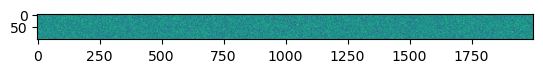

In [16]:
t = torch.rand(4, 114, 100, 2000)
t1, t2, t3, t4, t5, t6, t7, t8, t9, t10= torch.split(t, 200, dim=3)
# combine the chunks back together
t_combined = torch.cat([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10], dim=3)
import matplotlib.pyplot as plt
plt.imshow(t_combined[0,110,:,:])

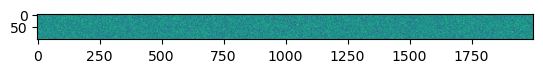

In [17]:
plt.imshow(t[0,110,:,:])

In [28]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, x, y):
        
        self.x = x
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx].float(), self.y[idx].float()

# Example usage:

# Define your input x and output y tensors
# For demonstration purposes, let's create dummy data
      # Example output tensor

# Create the custom dataset
dataset = CustomDataset(torch.tensor(x_train), torch.tensor(y_train))

# Create a DataLoader
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

test_dataset = CustomDataset(torch.tensor(x_test), torch.tensor(y_test))

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# # Iterate over the DataLoader
# for  batch_x, batch_y in dataloader:
#     #print(f"Batch indices: {idxs}")
#     print(f"Batch x shape: {batch_x.shape}")
#     print(f"Batch y shape: {batch_y.shape}")
#     # Here, idxs contains the indices of the samples in the current batch.
#     # Process your batch_x and batch_y as needed.
#     break  # Remove this break statement to iterate over the entire dataset.

In [11]:
criterion2 = nn.MSELoss()

from torch.optim.lr_scheduler import ExponentialLR
optimizer1 = optim.Adam(model1.parameters(), lr=0.0001)
gamma = .99999# The exponential decay factor (adjust as needed)
#scheduler1 = CosineAnnealingWarmRestarts(optimizer1, 200, 2)
scheduler1 = ExponentialLR(optimizer1, gamma=gamma)

#40,80,160,320,640

# from dilate.loss.dilate_loss import dilate_loss
# from tslearn.metrics import dtw, dtw_path
# #sigma = 0.01
gamma = 0.001
#Lambda=1
alpha=0.5
#import gc
model1.train()
num_epochs = 2000
iters=len(dataloader)
for epoch in range(num_epochs):

    count=0
    running_loss=0
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        optimizer1.zero_grad()
        #outputs = model0(inputs[:,:,:,:,0])
        #inputs=batch[0][:,0::10,:,:,:].to('cpu')
#         out2 = model(inputs)       
#         inputs=out2.squeeze()
        outputs = model1(inputs)
        #inputs = inputs.to('cpu')
        #outputs = outputs.to('cpu')
        #t_labels = torch.mean(labels, dim=(-2, -1)).unsqueeze(dim=2).to('cpu')
        #t_outputs = torch.mean(outputs, dim=(-2, -1)).unsqueeze(dim=2).to('cpu')
        
        #loss_dilate, loss_shape, loss_temporal = dilate_loss(t_labels,t_outputs,alpha, gamma, 'cpu') 
        #loss_norm = criterion1(outputs, labels)
        #print(loss_norm)
        loss_MSE = criterion2(outputs, labels)
        #loss_MAE = criterion3(outputs[0,-1,:,:], labels[0,-1,:,:])
        #loss_smooth = 0#criterion4(outputs, labels)
        # if torch.isnan(loss_smooth):
            # loss_smooth = torch.tensor(0.00001)
        loss = loss_MSE#(.5*loss_MSE+5*loss_MAE)/3
        loss.backward()
        optimizer1.step()
        scheduler1.step()
        #scheduler1.step(epoch + count / iters)

        count=count+1
        running_loss = running_loss+loss.item()
        #print (loss.item())
    # Model testing
    #print('epoch ', epoch, ' loss ', loss.item(),' loss dilate',loss_dilate.item(),' loss shape ',loss_shape.item(),' loss temporal ',loss_temporal.item())
    model1.eval()
    nn_errors=[]
    orig_errors=[]
    with torch.no_grad():
        for  inputs, labels2 in test_dataloader:
            inputs = inputs.to(device)
            labels2= labels2.to(device)
            #lab = torch.mean(lab, dim=(2,3)).squeeze()
            
            outputs2 = model1(inputs)          
            inputs = inputs.repeat_interleave(5, dim=3)
            #inp = torch.mean(inp, dim=(2,3)).squeeze()
            nn_error = criterion2(outputs2, labels2)
            orig_error = criterion2(labels2, inputs)
            nn_errors.append(nn_error.cpu().detach().numpy())
            orig_errors.append(orig_error.cpu().detach().numpy())
    print (np.mean(orig_errors), np.mean(nn_errors))
    current_lr = optimizer1.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")

1.2392824 0.3585723
Epoch 1/2000, Loss: 0.16561424359679222, Learning Rate: 0.00009998
1.2392824 0.36088672
Epoch 2/2000, Loss: 0.18343755106131235, Learning Rate: 0.00009996
1.2392824 0.3418745
Epoch 3/2000, Loss: 0.1715596541762352, Learning Rate: 0.00009995
1.2392824 0.35818982
Epoch 4/2000, Loss: 0.23835849720570776, Learning Rate: 0.00009993
1.2392824 0.34582928
Epoch 5/2000, Loss: 0.21251631010737684, Learning Rate: 0.00009991
1.2392824 0.35385644
Epoch 6/2000, Loss: 0.17975195248921713, Learning Rate: 0.00009989
1.2392824 0.35307434
Epoch 7/2000, Loss: 0.16009238672753176, Learning Rate: 0.00009987
1.2392824 0.3572976
Epoch 8/2000, Loss: 0.14498773196505177, Learning Rate: 0.00009986
1.2392824 0.3451286
Epoch 9/2000, Loss: 0.14702579027248752, Learning Rate: 0.00009984
1.2392824 0.36252543
Epoch 10/2000, Loss: 0.1468961439612839, Learning Rate: 0.00009982
1.2392824 0.3426335
Epoch 11/2000, Loss: 0.14717029045439428, Learning Rate: 0.00009980
1.2392824 0.3595807
Epoch 12/2000, Lo

KeyboardInterrupt: 

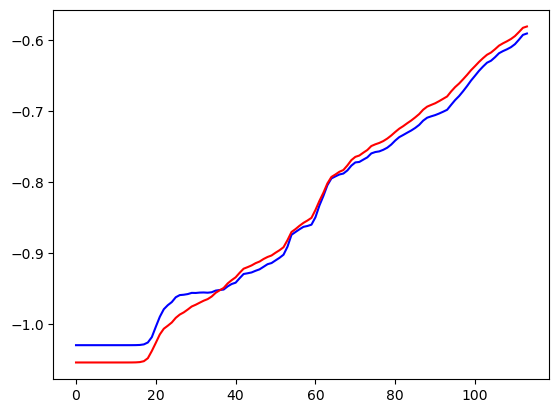

In [13]:
k=0
n=0
import matplotlib.pyplot as plt
inputs.shape
out_ts = []
for i in range(outputs.shape[1]):
    out_ts.append(np.mean(outputs2[k,i,:,:].cpu().detach().numpy()))

label_ts = []
for i in range(labels.shape[1]):
    label_ts.append(np.mean(labels2[k,i,:,:].cpu().detach().numpy()))

# inp_ts = []
# for i in range(inputs.shape[1]):
#     inp_ts.append(np.mean(inputs[k,i,:,:].cpu().detach().numpy()))
    
#plt.yscale('log')
plt.plot(out_ts, c='b') 
plt.plot(label_ts, c='r')
# plt.plot(inp_ts, c='g')

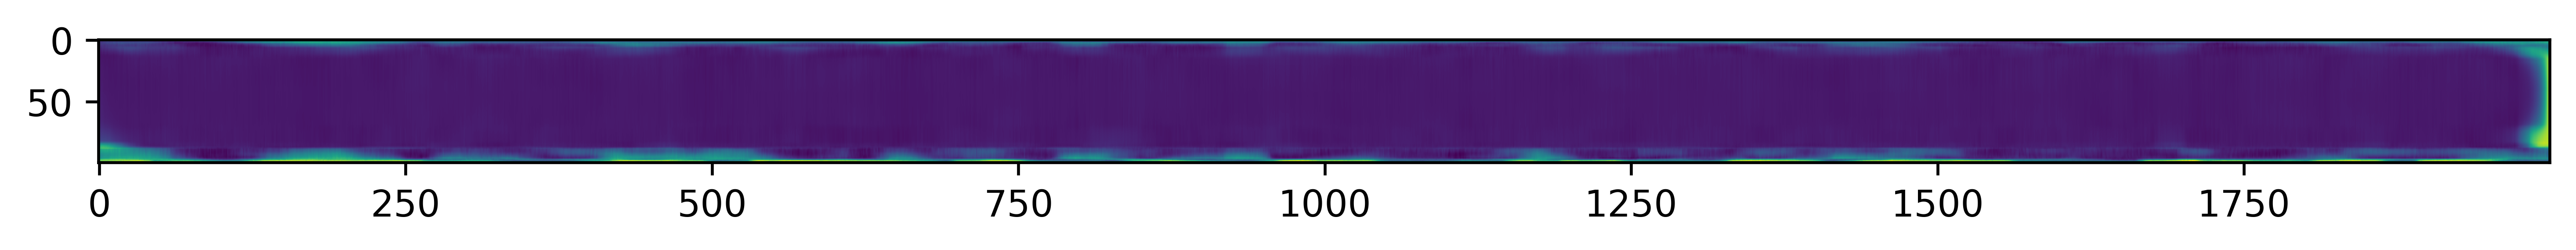

In [15]:
n=0
out = outputs2[n,104,:,:].cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)

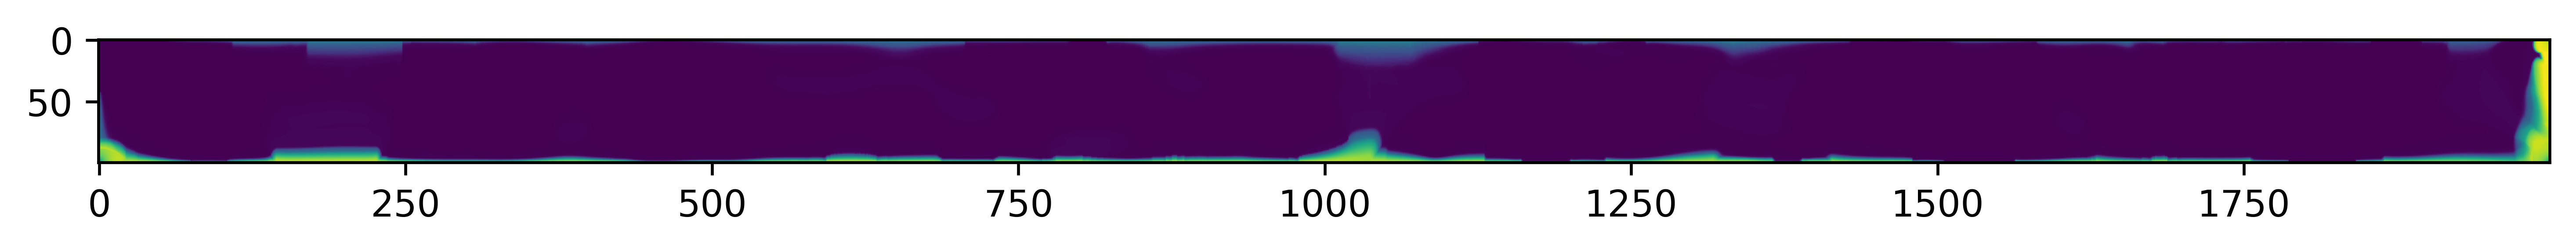

In [16]:

out = labels2[n,104,:,:].cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)

In [35]:
torch.save(model1.state_dict(), 'weights_bio_3_2_patch')

In [30]:
'patches_bio'+h5_files[0][12:-3]+str(i%100)+'.pt'

TypeError: unsupported operand type(s) for %: 'list' and 'int'

In [31]:
i%100

TypeError: unsupported operand type(s) for %: 'list' and 'int'